<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:11: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4108\509243760.py:11: SyntaxWarning: invalid escape sequence '\M'
  ruta = "C:/Users/Usuario/OneDrive/Documentos/Cursos/Sport Data Campus\Master en Python Avanzado al deporte/Modulo 11/Proyecto Final/Data/eventos_copa_america/eventos_copa_america_2024.csv"
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4108\509243760.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['under_pressure'] = tiros['under_pressure'].fillna(False).astype(int)



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42        21
           1       0.45      0.62      0.52        45
           2       0.32      0.21      0.25        38

    accuracy                           0.42       104
   macro avg       0.41      0.40      0.40       104
weighted avg       0.41      0.42      0.40       104



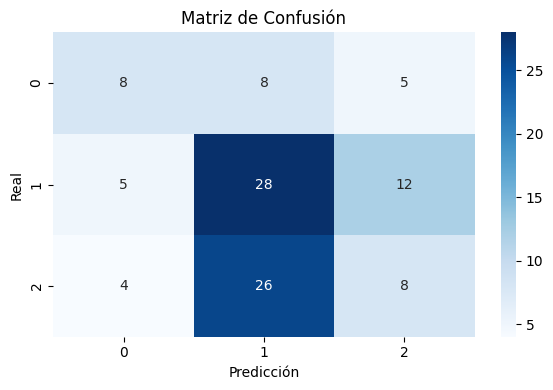

In [1]:
# 06_modelo_predictivo.ipynb

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset completo
ruta = "C:/Users/Usuario/OneDrive/Documentos/Cursos/Sport Data Campus\Master en Python Avanzado al deporte/Modulo 11/Proyecto Final/Data/eventos_copa_america/eventos_copa_america_2024.csv"
df = pd.read_csv(ruta, low_memory=False)

# -----------------------------
# Preparar dataset para clasificación de resultado de tiro
# -----------------------------
# Usamos solo eventos de tipo "Shot"
tiros = df[df['type'] == 'Shot'].copy()

# Convertir etiquetas (resultado del tiro)
tiros['shot_outcome'].value_counts()

# Solo conservar clases principales (Gol, Atajado, Fuera)
clases_utiles = ['Goal', 'Saved', 'Off T']
tiros = tiros[tiros['shot_outcome'].isin(clases_utiles)]

# Features seleccionadas (coordenadas, cuerpo, tipo de disparo, etc.)
X = pd.DataFrame()
X['x'] = tiros['location'].apply(lambda loc: eval(loc)[0] if isinstance(loc, str) and ',' in loc else None)
X['y'] = tiros['location'].apply(lambda loc: eval(loc)[1] if isinstance(loc, str) and ',' in loc else None)
X['under_pressure'] = tiros['under_pressure'].fillna(False).astype(int)
X['technique'] = tiros['shot_technique'].astype('category').cat.codes
X['body_part'] = tiros['shot_body_part'].astype('category').cat.codes

# Variable objetivo
y = tiros['shot_outcome'].astype('category').cat.codes

# -----------------------------
# Entrenamiento del modelo
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# -----------------------------
# Evaluación del modelo
# -----------------------------
y_pred = modelo.predict(X_test)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()
